In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('preprocessed_data.csv')

In [4]:
print(train)

       credit_score       age    tenure   balance  products_number  \
0          0.505353  0.545455  0.200000  0.000000         0.000000   
1          0.481799  0.522727  0.100000  0.334031         0.000000   
2          0.254818  0.545455  0.800000  0.636357         0.800000   
3          0.676660  0.477273  0.100000  0.000000         0.400000   
4          1.000000  0.568182  0.200000  0.500246         0.000000   
...             ...       ...       ...       ...              ...   
15921      0.796021  0.635139  0.294613  0.444239         0.800000   
15922      0.141680  0.920881  0.690375  0.499893         0.000000   
15923      0.573911  0.332799  0.258921  0.482150         0.000000   
15924      0.611469  0.556419  0.162646  0.000000         0.874707   
15925      0.797751  0.103138  0.900000  0.000000         0.000000   

       credit_card  active_member  estimated_salary  churn  
0              1.0            1.0          0.506735      1  
1              0.0            1.0    

In [5]:
train.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,0.505353,0.545455,0.2,0.000000,0.0,1.0,1.0,0.506735,1
1,0.481799,0.522727,0.1,0.334031,0.0,0.0,1.0,0.562709,0
2,0.254818,0.545455,0.8,0.636357,0.8,1.0,0.0,0.569654,1
3,0.676660,0.477273,0.1,0.000000,0.4,0.0,0.0,0.469120,0
4,1.000000,0.568182,0.2,0.500246,0.0,1.0,1.0,0.395400,0


In [7]:
NAs = pd.concat([train.isnull().sum()], axis=1, keys=["Train"])
NAs[NAs.sum(axis=1) > 0]

,Train


In [9]:
for col in train.dtypes[train.dtypes == "objects"].index:
    for_dummy = train.pop(col)
    train = pd.concat([train, pd.get_dummies(for_dummy, prefix = col)], axis=1)
    train.head()

In [10]:
labels = train.pop("churn")

In [13]:
print(labels)

0        1
1        0
2        1
3        0
4        0
        ..
15921    1
15922    1
15923    1
15924    1
15925    1
Name: churn, Length: 15926, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size = 0.25)

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [20]:
y_pred = rf.predict(x_test)

In [21]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8867674461328504

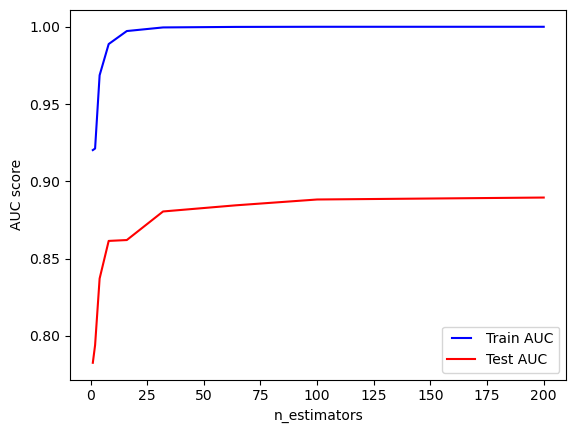

In [22]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators = estimator, n_jobs = -1)
    rf.fit(x_train, y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label= "Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

In [23]:
final_model = rf

In [24]:
sample_data = pd.DataFrame({
    'credit_score': [0.8, 0.6, 0.5, 0.7, 0.9],
    'age': [0.3, 0.4, 0.6, 0.2, 0.5],
    'tenure': [0.7, 0.2, 0.4, 0.8, 0.6],
    'balance': [0.1, 0.5, 0.3, 0.9, 0.4],
    'products_number': [0.6, 0.4, 0.2, 0.8, 0.7],
    'credit_card': [1, 0, 1, 1, 0],
    'active_member': [1, 1, 0, 0, 1],
    'estimated_salary': [0.7, 0.3, 0.5, 0.8, 0.6]
})

# Display the sample data
print("Sample Data:")
print(sample_data)

Sample Data:
   credit_score  age  tenure  balance  products_number  credit_card  \
0           0.8  0.3     0.7      0.1              0.6            1   
1           0.6  0.4     0.2      0.5              0.4            0   
2           0.5  0.6     0.4      0.3              0.2            1   
3           0.7  0.2     0.8      0.9              0.8            1   
4           0.9  0.5     0.6      0.4              0.7            0   

   active_member  estimated_salary  
0              1               0.7  
1              1               0.3  
2              0               0.5  
3              0               0.8  
4              1               0.6  


In [25]:
new_data_predictions = final_model.predict(sample_data)


In [26]:
print(new_data_predictions)

[1 0 1 1 1]
